In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.tsa.api as smt  
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics
import requests
import io

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns',200)

In [2]:
df = pd.read_csv('final_sentiment_csv.csv')
df.head()

,Unnamed: 0,listing_id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,sentiment_polarity,sentiment_sub
0,0,18666,3,95.0,0.0,47.0,5.0,1.0,1.0,1.0,1,0,6.0,2,2,4,4,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,0.0,0,0.0,0.0,31.0,31.0,0.0,0.0,0.02,4.867534,0.359583,0.539583
1,1,18674,3,95.0,0.0,47.0,5.0,1.0,1.0,1.0,1,0,8.0,4,3,6,4,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1.0,3,0.0,0.0,31.0,31.0,0.0,0.0,0.21,4.094345,0.225551,0.526540
2,2,21605,2,100.0,0.0,2.0,6.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,41.0,33.0,100.000000,89.922336,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,0.0,1,0.0,0.0,2.0,0.0,2.0,0.0,3.05,3.496508,0.354642,0.618683
3,3,23197,3,100.0,1.0,5.0,8.0,1.0,1.0,0.0,1,0,6.0,4,3,5,4,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1.0,3,0.0,1.0,2.0,2.0,0.0,0.0,0.47,5.347108,0.332431,0.571535
4,4,25786,3,100.0,1.0,1.0,8.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,17.0,45.0,991.363756,-10.009156,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3,1.0,1.0,1.0,0.0,1.0,0.0,2.29,3.806662,0.398952,0.621173


In [3]:
df.drop(['Unnamed: 0','listing_id','price'],1,inplace = True)

In [4]:
df.head(2)

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,sentiment_polarity,sentiment_sub
0,3,95.0,0.0,47.0,5.0,1.0,1.0,1.0,1,0,6.0,2,2,4,4,18.0,150.0,42.0,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,0.0,0,0.0,0.0,31.0,31.0,0.0,0.0,0.02,4.867534,0.359583,0.539583
1,3,95.0,0.0,47.0,5.0,1.0,1.0,1.0,1,0,8.0,4,3,6,4,22.0,150.0,50.0,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1.0,3,0.0,0.0,31.0,31.0,0.0,0.0,0.21,4.094345,0.225551,0.526540


In [5]:
X = df.drop(["log_price"],1)   #Feature Matrix
y = df["log_price"]          #Target Variable
X.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment_polarity,sentiment_sub
0,3,95.0,0.0,47.0,5.0,1.0,1.0,1.0,1,0,6.0,2,2,4,4,18.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,0.0,0,0.0,0.0,31.0,31.0,0.0,0.0,0.02,0.359583,0.539583
1,3,95.0,0.0,47.0,5.0,1.0,1.0,1.0,1,0,8.0,4,3,6,4,22.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1.0,3,0.0,0.0,31.0,31.0,0.0,0.0,0.21,0.225551,0.526540
2,2,100.0,0.0,2.0,6.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,41.0,100.000000,89.922336,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,0.0,1,0.0,0.0,2.0,0.0,2.0,0.0,3.05,0.354642,0.618683
3,3,100.0,1.0,5.0,8.0,1.0,1.0,0.0,1,0,6.0,4,3,5,4,46.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1.0,3,0.0,1.0,2.0,2.0,0.0,0.0,0.47,0.332431,0.571535
4,3,100.0,1.0,1.0,8.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,17.0,991.363756,-10.009156,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3,1.0,1.0,1.0,0.0,1.0,0.0,2.29,0.398952,0.621173


In [6]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 69.399180
Best score using built-in LassoCV: 0.000012


In [7]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 50 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

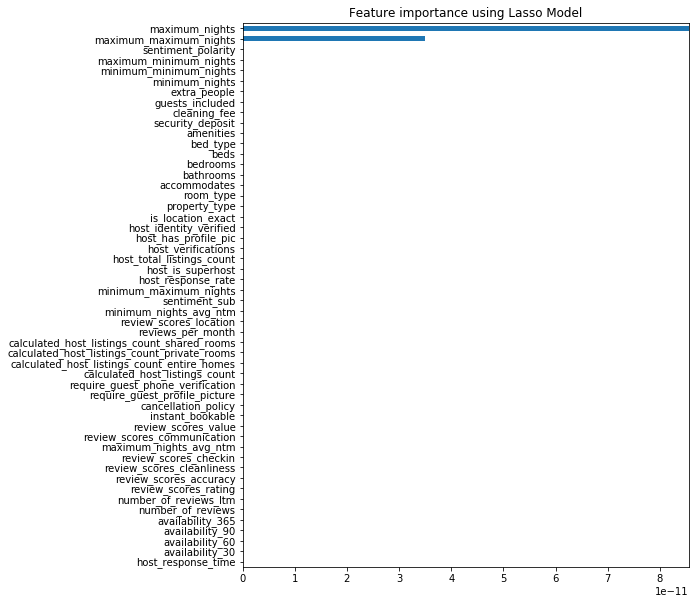

In [8]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [9]:
feat = ['maximum_nights','maximum_maximum_nights']

In [10]:
X = df[feat]
y = df.log_price

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     71.01
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.99e-31
Time:                        02:55:34   Log-Likelihood:                -19706.
No. Observations:               16038   AIC:                         3.942e+04
Df Residuals:                   16035   BIC:                         3.944e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.2316      0.007    647.617      0.000       4.219       4.244
maximum_nights            -0.0003   2.52e-05    -11.909      0.000      -0.000      -0.000
maximum_maximum_nights     0.0003   2.52e-05     11.909      0.000       0.000       0.000
==============================================================================
Omnibus:                     3465.652   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10663.686
Skew:                           1.111   Prob(JB):                         0.00
Kurtosis:                       6.319   Cond. No.                     3.39e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X = df.drop('log_price',1)
y = df.log_price

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [15]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     328.9
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        02:55:34   Log-Likelihood:                -13942.
No. Observations:               16038   AIC:                         2.799e+04
Df Residuals:                   15985   BIC:                         2.840e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.1618      0.195     16.216      0.000       2.780       3.544
host_response_time                              -0.0060      0.007     -0.906      0.365      -0.019       0.007
host_response_rate                               0.0009      0.000      2.254      0.024       0.000       0.002
host_is_superhost                                0.0078      0.012      0.647      0.517      -0.016       0.031
host_total_listings_count                       -0.0023      0.000    -15.159      0.000      -0.003      -0.002
host_verifications                              -0.0156      0.002     -6.708      0.000      -0.020      -0.011
host_has_profile_pic                            -0.0247      0.104     -0.237      0.813      -0.229       0.180
host_identity_verified                           0.0027      0.010      0.267      0.789      -0.017       0.023
is_location_exact                                0.0077      0.010      0.773      0.439      -0.012       0.027
property_type                                    0.0005      0.001      0.680      0.497      -0.001       0.002
room_type                                       -0.0038      0.006     -0.658      0.511      -0.015       0.007
accommodates                                     0.1656      0.003     50.740      0.000       0.159       0.172
bathrooms                                       -0.0055      0.004     -1.250      0.211      -0.014       0.003
bedrooms                                         0.0083      0.008      1.031      0.303      -0.008       0.024
beds                                            -0.0018      0.004     -0.398      0.691      -0.010       0.007
bed_type                                        -0.0314      0.036     -0.876      0.381      -0.102       0.039
amenities                                        0.0033      0.000      7.201      0.000       0.002       0.004
security_deposit                              3.149e-05   1.42e-05      2.216      0.027    3.64e-06    5.93e-05
cleaning_fee                                     0.0019      0.000     11.432      0.000       0.002       0.002
guests_included                                  0.0356      0.004      8.847      0.000       0.028       0.044
extra_people                                     0.0018      0.000      5.255      0.000       0.001       0.002
minimum_nights                                  -0.0019      0.002     -0.922      0.357      -0.006       0.002
maximum_nights                               -4.424e-05    4.9e-05     -0.904      0.366      -0.000    5.17e-05
minimum_minimum_nights                          -0.0078      0.002     -3.534      0.000      -0.012      -0.003
maximum_minimum_nights          

In [16]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
model1=lin_reg.fit(X_test,y_test)
print(f'R^2 score for train: {model.score(X_train, y_train)}')
print(f'R^2 score for test: {model.score(X_test, y_test)}')

R^2 score for train: 0.5141888631537749
R^2 score for test: 0.5025276492436324


In [17]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from sklearn.linear_model import LinearRegression

In [18]:
import xgboost
from sklearn.metrics import explained_variance_score

In [19]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [20]:
xgb.fit(X_train,y_train)

[02:55:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [21]:
predictions = xgb.predict(X_test)
print(explained_variance_score(y_test,predictions))

0.7492150916247109


In [22]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.92%


In [23]:
# from sklearn.ensemble import AdaBoostRegressor

# ada_clf=AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1.0, loss='linear',
#         n_estimators=150, random_state=0)
# ada_clf.fit(X_train, y_train)

In [24]:
# ada_clf.score(X_test, y_test)

In [25]:
# ada_clf.score(X_train, y_train)

# PCA

In [26]:
col_label = ['host_response_time', 'property_type', 'room_type', 'bed_type', 'beds','bathrooms','bedrooms',
 'cancellation_policy','log_price'] 
df[col_label] = df[col_label].astype(object)

In [27]:
X_= df.drop(col_label,1)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X_)

In [29]:
df_new = pd.DataFrame(x_scaled, columns = X_.columns)
df_new.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment_polarity,sentiment_sub
0,0.018457,-0.486360,0.520853,-0.254721,0.044007,1.381138,0.685586,1.200597,-0.366795,-0.099418,0.154947,0.047058,1.098523,-0.219326,-0.011166,-0.198353,-0.254201,-0.011166,-0.011166,-0.231036,-0.011166,-0.912082,-1.220310,-1.411366,0.611505,-0.654396,-0.856018,-1.085546,0.634385,0.725642,-8.131005,0.500271,0.539046,-0.947371,-1.133552,-0.121945,-0.196288,0.669012,0.738471,-0.429646,-0.084585,-1.067961,0.152145,-0.192102
1,0.018457,-0.486360,0.520853,-0.254721,0.044007,1.381138,0.685586,2.110727,-0.013514,-0.099418,0.373017,0.047058,1.447906,-0.359189,-0.011150,-0.339288,-0.125000,-0.011149,-0.011150,-0.307869,-0.011150,0.802277,0.559638,0.121716,-0.923553,-0.424852,-0.280270,-0.583682,-0.367468,-0.196673,-0.586598,0.500271,-0.766555,-0.947371,0.882182,-0.121945,-0.196288,0.669012,0.738471,-0.429646,-0.084585,-0.956089,-0.751062,-0.271925
2,0.423272,-0.486360,-0.286646,0.210142,0.044007,1.381138,0.685586,-0.619664,1.664571,-0.242348,1.461250,-0.574113,0.050375,-0.289258,-0.011150,-0.268820,-0.189600,-0.011149,-0.011150,-0.293899,-0.011150,-0.516460,-1.048057,-1.304407,-1.301532,1.243163,0.766544,-0.081819,0.634385,-0.196673,0.491174,0.500271,-0.766555,-0.001413,-1.133552,-0.121945,-0.196288,-0.396359,-0.396317,0.174586,-0.084585,0.716104,0.118845,0.291983
3,0.423272,2.056091,-0.232813,1.139867,0.044007,1.381138,-1.458607,1.200597,2.106172,0.329373,1.190780,0.668230,0.050375,-0.219326,-0.011150,-0.198353,-0.125000,-0.011149,-0.011150,-0.224051,-0.011150,0.406656,0.674473,0.585205,1.190044,0.080143,0.033774,0.319672,0.634385,0.725642,0.491174,0.500271,-0.766555,-0.001413,0.882182,-0.121945,5.094568,-0.396359,-0.323105,-0.429646,-0.084585,-0.803001,-0.030825,0.003440
4,0.423272,2.056091,-0.304591,1.139867,0.044007,1.381138,0.685586,-0.619664,-0.455115,2.305709,-1.262759,-0.574113,1.098523,-0.359189,-0.011166,-0.339288,-0.383402,-0.011166,-0.011166,-0.370732,-0.011166,0.406656,0.559638,0.050410,-0.730706,3.217237,1.656336,0.420045,0.634385,0.725642,0.491174,0.500271,0.539046,0.944544,0.882182,8.200415,5.094568,-0.433096,-0.396317,-0.127530,-0.084585,0.268616,0.417438,0.307218


In [30]:
print(df_new.shape)

(16038, 44)


In [31]:
df.reset_index(inplace=True)
df.shape

(16038, 54)

In [32]:
data1=pd.concat([df_new,df[col_label]],axis=1)
data1.tail()
data1.shape

(16038, 53)

In [33]:
data = data1.drop('log_price',1)

In [34]:
data.head(3)

,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,sentiment_polarity,sentiment_sub,host_response_time,property_type,room_type,bed_type,beds,bathrooms,bedrooms,cancellation_policy
0,0.018457,-0.48636,0.520853,-0.254721,0.044007,1.381138,0.685586,1.200597,-0.366795,-0.099418,0.154947,0.047058,1.098523,-0.219326,-0.011166,-0.198353,-0.254201,-0.011166,-0.011166,-0.231036,-0.011166,-0.912082,-1.220310,-1.411366,0.611505,-0.654396,-0.856018,-1.085546,0.634385,0.725642,-8.131005,0.500271,0.539046,-0.947371,-1.133552,-0.121945,-0.196288,0.669012,0.738471,-0.429646,-0.084585,-1.067961,0.152145,-0.192102,3,1,0,4,4,2,2,0
1,0.018457,-0.48636,0.520853,-0.254721,0.044007,1.381138,0.685586,2.110727,-0.013514,-0.099418,0.373017,0.047058,1.447906,-0.359189,-0.011150,-0.339288,-0.125000,-0.011149,-0.011150,-0.307869,-0.011150,0.802277,0.559638,0.121716,-0.923553,-0.424852,-0.280270,-0.583682,-0.367468,-0.196673,-0.586598,0.500271,-0.766555,-0.947371,0.882182,-0.121945,-0.196288,0.669012,0.738471,-0.429646,-0.084585,-0.956089,-0.751062,-0.271925,3,1,0,4,6,4,3,3
2,0.423272,-0.48636,-0.286646,0.210142,0.044007,1.381138,0.685586,-0.619664,1.664571,-0.242348,1.461250,-0.574113,0.050375,-0.289258,-0.011150,-0.268820,-0.189600,-0.011149,-0.011150,-0.293899,-0.011150,-0.516460,-1.048057,-1.304407,-1.301532,1.243163,0.766544,-0.081819,0.634385,-0.196673,0.491174,0.500271,-0.766555,-0.001413,-1.133552,-0.121945,-0.196288,-0.396359,-0.396317,0.174586,-0.084585,0.716104,0.118845,0.291983,2,1,2,4,1,2,1,1


In [35]:
from sklearn.decomposition import PCA
pca=PCA(data.shape[1])

In [36]:
pca1=pca.fit(data)

In [37]:
B=pca1.fit_transform(data)
print(B)

[[-2.42764133e+00  3.20222874e+00  9.75008601e-01 ... -4.50742575e-07
  -3.11975515e-06  1.85937596e-07]
 [-2.33665921e+00  2.49164091e+00  4.43133763e+00 ... -1.08105290e-06
  -7.47459998e-07 -2.44990817e-10]
 [-2.39456475e+00 -1.76459393e+00 -1.32495173e+00 ...  1.55353032e-06
   3.52643745e-07 -1.54908493e-08]
 ...
 [-2.39587887e+00  3.62180544e+00 -2.80027408e+00 ... -8.51574554e-07
   5.21490596e-08 -2.72737163e-07]
 [-2.33548267e+00  5.60826066e+00 -2.86219797e+00 ...  1.59333871e-06
   4.86246227e-07 -1.39328157e-07]
 [ 7.57962612e+00  3.31739683e+00 -2.09022768e+00 ... -9.42526686e-07
  -4.87673139e-07 -7.64192794e-08]]


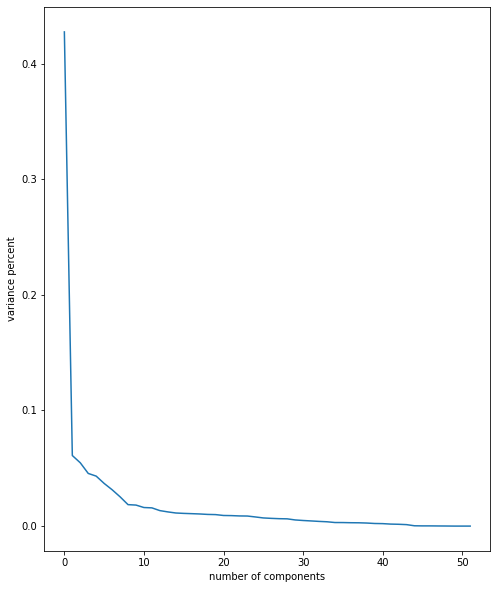

In [38]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('variance percent')
plt.show()

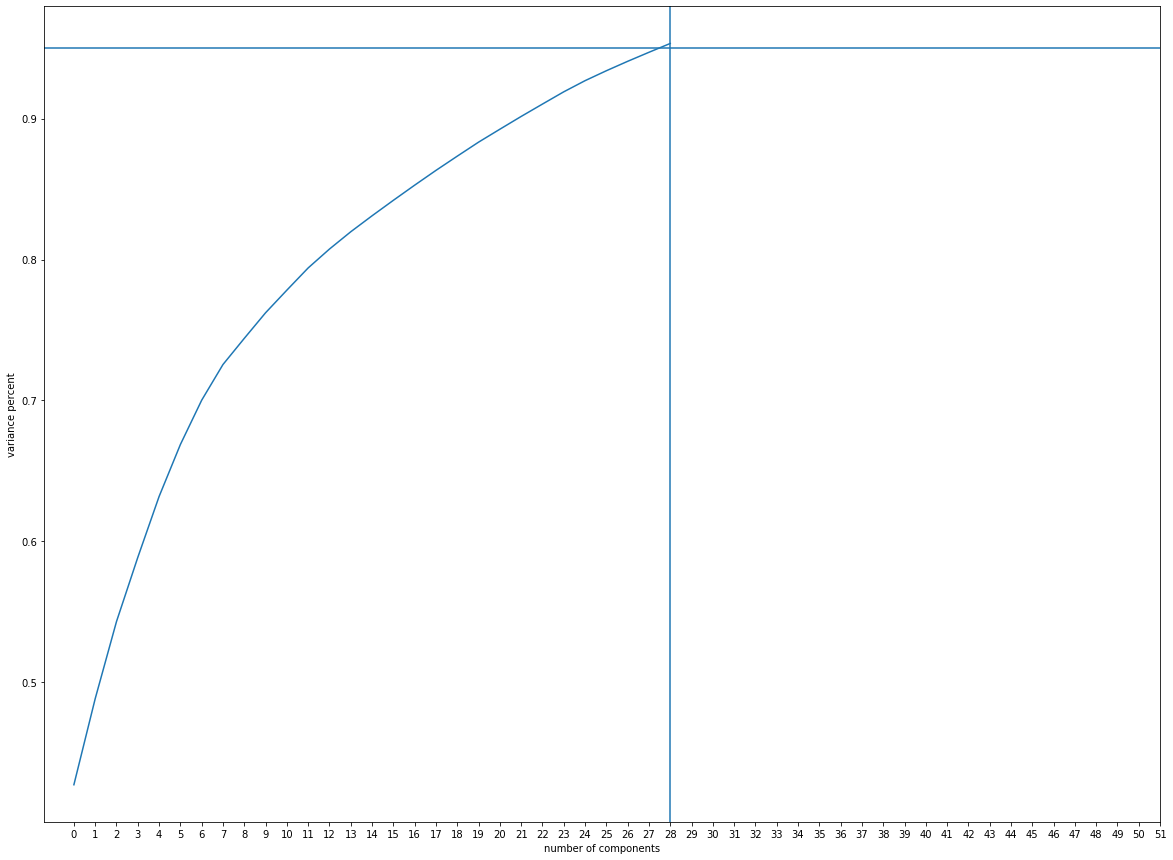

In [51]:
plt.figure(figsize=(20,15))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(data.shape[1]))
plt.xlabel('number of components')
plt.ylabel('variance percent')
plt.axhline(0.95)
plt.axvline(28)


plt.show()

In [52]:
# plt.figure(figsize=(20,15))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xticks(np.arange(data.shape[1]))
# plt.xlabel('number of components')
# plt.ylabel('variance percent')
# plt.axhline(0.95)
# plt.axvline(27)


# plt.show()

In [40]:
from sklearn.decomposition import PCA
pca=PCA(29) 

In [41]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=29, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
B=pca.transform(data)
print(B)

[[-2.42764133  3.20222871  0.97500853 ...  1.06777958 -0.19873402
  -4.34050186]
 [-2.33665921  2.49164092  4.43133764 ... -0.122947    0.71035408
   0.58761635]
 [-2.39456475 -1.76459391 -1.32495173 ... -0.399192    0.83036777
   0.90702606]
 ...
 [-2.39587887  3.62180552 -2.80027406 ... -0.66068529  0.18389393
   1.85892218]
 [-2.33548267  5.60826071 -2.86219793 ... -1.39283667  0.93636201
  -0.0096109 ]
 [ 7.57962612  3.31739683 -2.09022769 ... -0.28215198  0.98738181
   0.27454322]]


In [43]:
d=pd.DataFrame(B)

In [46]:
da1 = pd.concat([d, data1['log_price']], axis = 1)

In [47]:
X = da1.drop("log_price",1)   #Feature Matrix
y = da1["log_price"]          #Target Variable
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-2.427641,3.202229,0.975009,-0.639546,-0.151960,0.133959,-2.414855,-0.186604,-0.360076,-2.119861,0.629487,0.916459,0.155283,-1.893677,-0.160239,0.720902,0.368787,0.341397,-0.146494,0.369898,-0.366638,-0.144620,0.991389,0.943728,1.279576,-0.697578,1.067780,-0.198734,-4.340502
1,-2.336659,2.491641,4.431338,-0.673160,-0.346097,0.261547,0.038659,-0.817899,0.928989,-0.785718,-0.793949,-0.268825,-0.007606,-0.196752,-0.310771,-0.171873,0.506367,0.404829,0.413873,-0.202896,-1.162258,-0.743609,0.850175,0.802163,-0.237236,1.200245,-0.122947,0.710354,0.587616
2,-2.394565,-1.764594,-1.324952,-0.127978,0.053194,-0.034100,-1.522018,2.204694,-0.411002,-0.884091,0.165842,0.021447,1.323696,-0.424427,0.641435,0.639521,-0.306744,-0.166756,-0.096956,0.103362,-0.895312,0.205350,0.082724,0.382108,1.104437,1.040300,-0.399192,0.830368,0.907026
3,-2.241180,0.128006,4.555087,0.029165,-0.151648,-1.138101,1.181244,1.212870,3.243499,-0.895535,1.068152,0.241549,-0.995741,1.076838,1.246372,-2.063202,0.241709,-0.392878,-0.396551,1.719938,-0.267283,-0.380647,-0.673546,-0.422638,1.169668,-0.009337,0.102652,-0.957105,0.841988
4,-2.301774,-3.134114,-0.152601,-0.734172,-0.014369,-0.977514,0.492493,4.006061,6.026026,1.101050,6.201456,0.597357,-2.706112,1.421340,0.521353,-1.386254,0.763295,-0.196228,0.434811,0.324217,0.408706,1.590634,1.339234,0.231492,-2.199420,1.083947,0.910389,0.985837,-0.488492


In [48]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.002280
Best score using built-in LassoCV: 0.448914


In [53]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 27 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

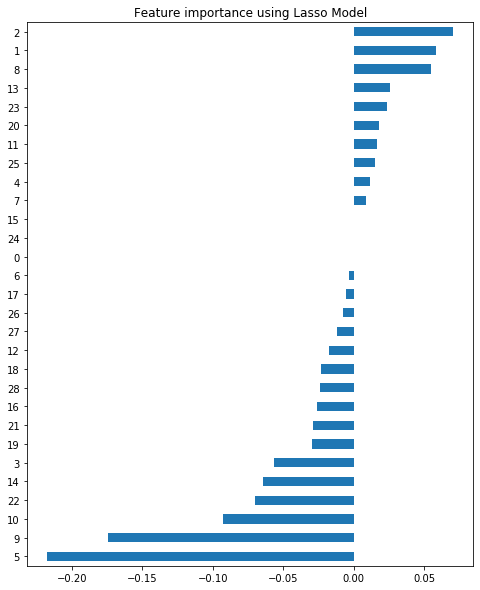

In [54]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [56]:
feature_cols = X.columns

x = da1[feature_cols]
y = da1.log_price

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
X_train.shape

(11226, 29)

In [67]:
y_train.shape

(11226,)

In [69]:
# X_constant = sm.add_constant(x)
# lin_reg = sm.OLS(y,X_constant).fit()
# lin_reg.summary()

In [70]:
regressor.score(X_train,y_train)

0.45266875819382046

In [71]:
regressor.score(X_test,y_test)

0.4393273544140027

### XGB PCA

In [72]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [73]:
xgb.fit(X_train,y_train)

[03:01:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [74]:
predictions = xgb.predict(X_test)
print(explained_variance_score(y_test,predictions))

0.5503458690087827


In [75]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.03%


In [76]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_tree = BaggingRegressor(DecisionTreeRegressor(),
                   max_features=0.8, n_estimators=200, 
                            random_state=0)
dtree= DecisionTreeRegressor()

In [79]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss='linear',
        n_estimators=20, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=20,
                  rando

In [80]:
ada_clf.score(X_test, y_test)

0.48851934241143485